In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Upload Data

In [3]:
#Upload CSV into Python
df = pd.read_csv('HW3Data.csv', header = None, comment ='#')
genes = np.genfromtxt('Genes.txt', delimiter = '\n', dtype = str)
df.columns = np.append('Labels', genes)
df

,Labels,Hsa.3004 H55933 3' UTR 1 203417 H.sapiens mRNA for homologue to yeast ribosomal protein L41.,Hsa.13491 R39465 3' UTR 2a 23933 EUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus),Hsa.13491 R39465 3' UTR 2a 23933 EUKARYOTIC INITIATION FACTOR 4A (Oryctolagus cuniculus),Hsa.37254 R85482 3' UTR 2a 180093 SERUM RESPONSE FACTOR (Homo sapiens),"Hsa.541 U14973 gene 1 ""Human ribosomal protein S29 mRNA, complete cds. """,Hsa.20836 R02593 3' UTR 2a 124094 60S ACIDIC RIBOSOMAL PROTEIN P1 (Polyorchis penicillatus),Hsa.1977 T51496 3' UTR 1 71488 60S RIBOSOMAL PROTEIN L37A (HUMAN).,Hsa.44472 H80240 3' UTR 2a 240814 INTER-ALPHA-TRYPSIN INHIBITOR COMPLEX COMPONENT II PRECURSOR (Homo sapiens),Hsa.3087 T65938 3' UTR 1 81639 TRANSLATIONALLY CONTROLLED TUMOR PROTEIN (HUMAN);.,...,Hsa.2618 X67699 gene 1 H.sapiens HE5 mRNA for CDw52 antigen.,Hsa.27285 R70790 3' UTR 2a 142585 GTP:AMP PHOSPHOTRANSFERASE MITOCHONDRIAL (Rattus norvegicus),"Hsa.41260 L11706 gene 1 ""Human hormone-sensitive lipase (LIPE) gene, complete cds. """,Hsa.14822 T90549 3' UTR 2a 110713 P-SELECTIN PRECURSOR (Homo sapiens),Hsa.336 D17390 gene 1 Human mRNA for MDC protein.,"Hsa.984 M33210 gene 1 ""Human colony stimulating factor 1 receptor (CSF1R) gene, exon 5. """,Hsa.35124 H18490 3' UTR 2a 171840 RAN GTPASE ACTIVATING PROTEIN 1 (Mus musculus),Hsa.3952 H40891 3' UTR 2a 175983 NODULATION PROTEIN Q (Azospirillum brasilense),Hsa.32734 R77780 3' UTR 2a 145300 TRANSPOSABLE ELEMENT ACTIVATOR (Zea mays),Hsa.9683 T49647 3' UTR 2a 67762 MYRISTOYLATED ALANINE-RICH C-KINASE SUBSTRATE (Homo sapiens)
0,0,2.080754,1.099069,0.927763,1.029081,-0.130763,1.265460,-0.436286,0.728881,2.107979,...,-0.825403,-0.138451,0.382957,0.876697,-0.216234,-1.408300,0.393327,-0.148522,1.591533,-0.217481
1,1,1.109457,0.786453,0.445560,-0.146323,-0.996316,0.555759,0.290734,-0.145259,1.132660,...,-1.056288,-0.205499,-1.815374,0.324373,-1.296909,-0.870757,1.108739,1.094010,-0.492141,-1.554079
2,0,-0.676530,1.693100,1.559247,1.559983,-0.982179,-1.358507,-1.313994,-0.455067,0.295214,...,1.242968,1.230157,-2.038999,2.366093,0.820656,1.404501,0.176860,-0.086285,-0.390878,-0.089465
3,1,0.534396,1.677537,1.489030,0.778605,-0.183776,-1.116850,-1.487557,-0.579511,0.292683,...,0.559852,-0.593149,-4.440577,1.720705,-0.124617,-0.435880,0.228440,-0.893938,1.005879,-0.631247
4,0,-1.018903,0.511080,0.755641,1.013816,0.529899,0.160440,-0.087055,1.295290,0.458736,...,0.227110,0.497628,-0.083921,-0.382733,-0.913389,1.122928,0.834571,-0.283786,-2.860340,0.280871
5,1,-1.185369,-0.514473,-0.566634,1.224720,0.619244,-0.684713,-0.798129,1.368770,-0.697007,...,0.926855,0.302304,0.302785,-1.170087,-1.189162,0.418884,-2.247347,-0.455263,-1.528083,0.327891
6,0,1.779054,0.423947,0.820696,2.525687,0.666921,0.661346,0.425365,0.165247,1.967905,...,0.284194,-0.555516,-1.455897,-0.240853,0.249138,-0.915572,-0.764530,-0.808293,0.003886,-0.379341
7,1,-0.889638,-0.315453,-0.073131,1.157503,-0.311039,-0.364472,-1.621636,1.192999,0.689805,...,-0.113531,-0.485290,-0.094577,-0.809093,0.453226,-0.009268,-0.872640,-1.730826,0.665384,0.977573
8,0,-0.659694,-0.184388,-0.540022,1.122418,0.562609,-2.988315,-2.349808,-1.325007,-0.017002,...,-0.819396,-0.952811,0.065197,0.985648,0.745522,0.508879,0.846929,0.644346,0.156497,-0.147716
9,1,-1.225801,-0.212615,-0.588923,1.335412,-0.356505,0.354394,0.699607,0.190782,-0.139117,...,1.772469,0.804056,-0.361595,-0.975587,-0.652528,-0.106173,-0.613650,-0.886065,0.645764,0.142760


# Split the Data for Testing and Training

In [4]:
#This is done to define x and y. I did not include 0 because that is patient identifer.
from sklearn.preprocessing import LabelEncoder,StandardScaler

X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values 
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array([0, 1])

In [5]:
#split the data 80/20 for training and testing respectively
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [6]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (49, 2000)
Y_train shape:  (49,)
X_test shape:  (13, 2000)
Y_test shape:  (13,)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

Optimal number of features : 4


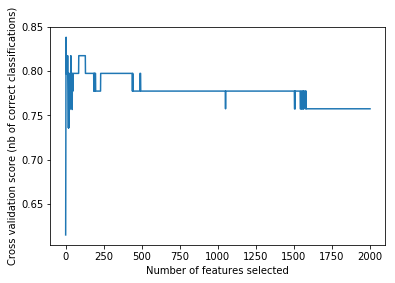

Performace score for test set: 0.923


In [9]:
#Use StandardScaler to scale the training and test data 
#Performing the RFE method with cross validation
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')

feature_elim = rfecv.fit(X_train_transformed,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
print("Performace score for test set: %.3f" %feature_elim.score(X_test_transformed,y_test))

# Find the location of the selected features

In [10]:
SelectedFeatureLocation=np.where(rfecv.support_==True)
SelectedFeatureName=df.columns[SelectedFeatureLocation]

print("Locations of selected features : %s" % SelectedFeatureLocation)
print("Names of selected features : \n%s" % SelectedFeatureName)

Locations of selected features : [ 248  376  787 1959]
Names of selected features : 
Index(['Hsa.8177\tR16255\t3' UTR\t2a\t53079\tSERINE/THREONINE PROTEIN PHOSPHATASE 2B CATALYTIC SUBUNIT 2 (Homo sapiens)',
       'Hsa.3056\tX59871\tgene\t1\t\tHuman TCF-1 mRNA for T cell factor 1 (splice form C).',
       'Hsa.1854\tM83667\tgene\t1\t\t"Human NF-IL6-beta protein mRNA, complete cds.                                                                                                                                                                                                        "',
       'Hsa.1143\tM15841\tgene\t1\t\tU2 SMALL NUCLEAR RIBONUCLEOPROTEIN B' (HUMAN);.'],
      dtype='object')
